In [2]:
#Raghavendraswamy
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_excel('heart_disease.xlsx')

In [10]:
df.head()

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [11]:
df.tail()

,age,Age in years
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment
10,thal,Thal
11,num,"target [0=no heart disease; 1,2,3,4 = stages o..."


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 320.0+ bytes


In [13]:
df.describe()

,age,Age in years
count,12,12
unique,12,12
top,Gender,"Gender ; Male - 1, Female -0"
freq,1,1


In [14]:
df.isnull().sum()

,0
age,0
Age in years,0


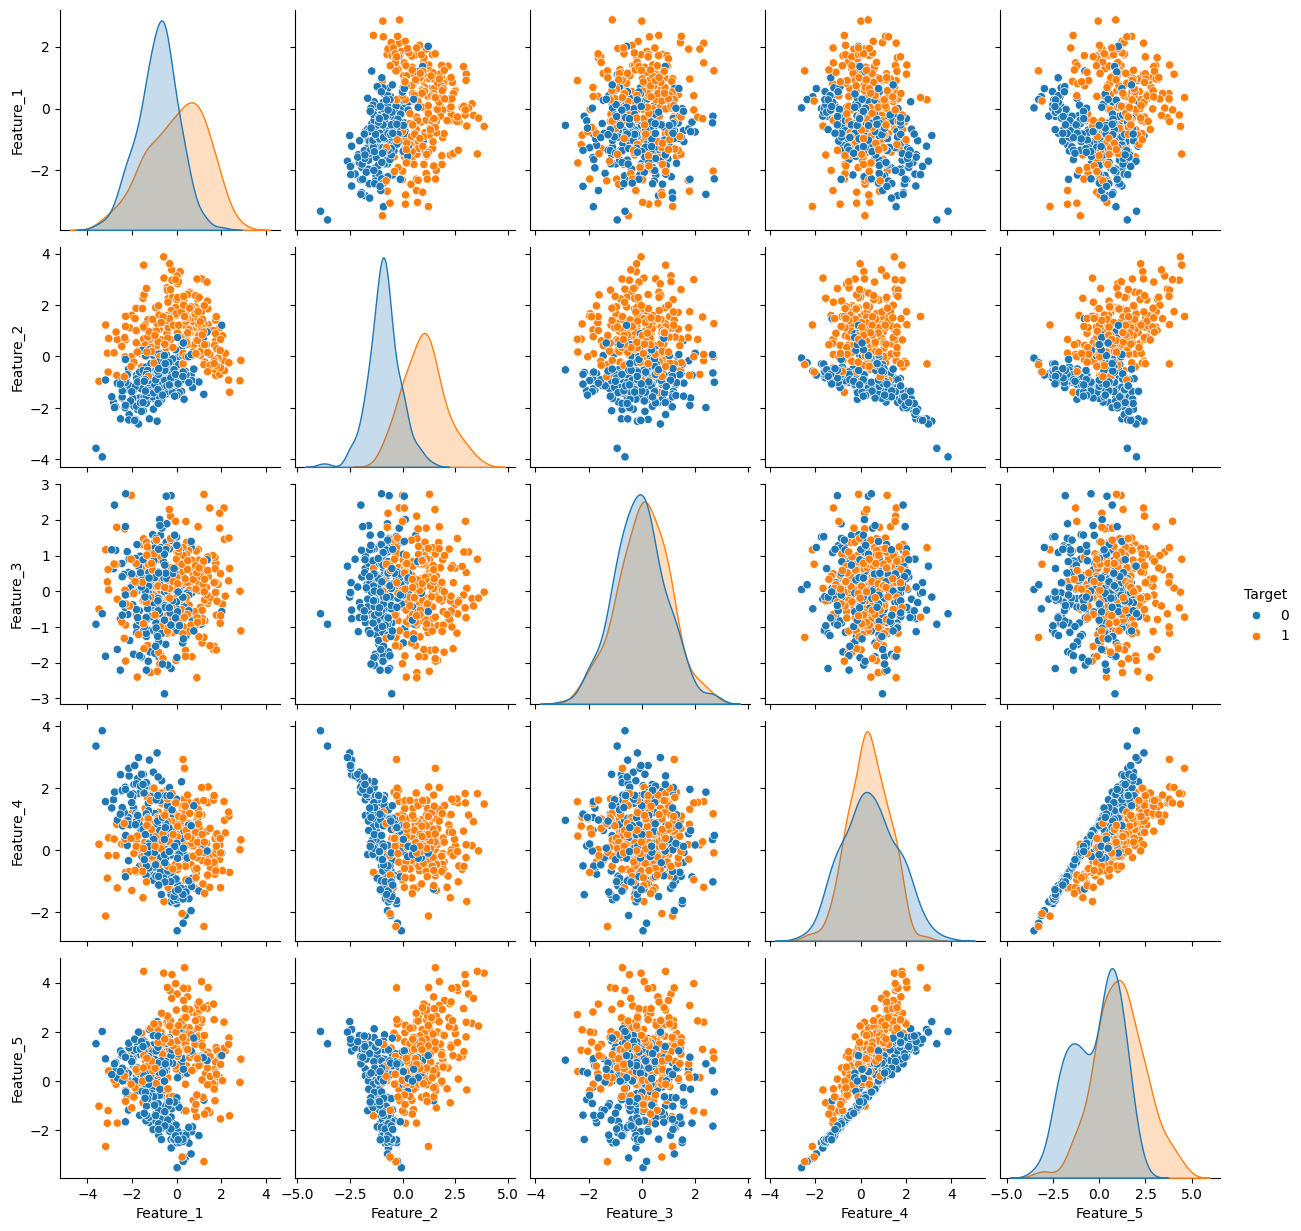

In [15]:
# Visualize distributions
sns.pairplot(data, hue='Target')
plt.show()

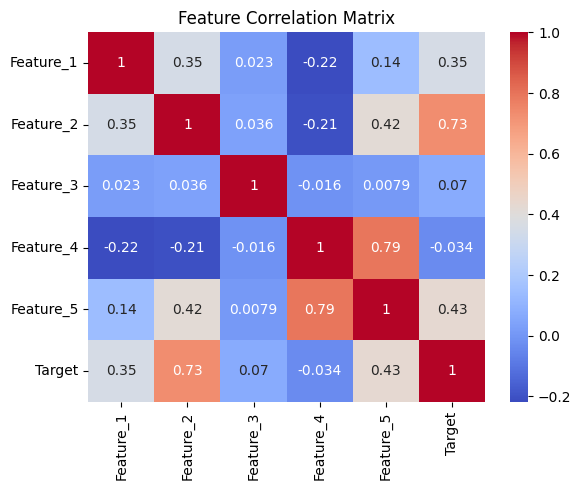

In [17]:
# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [18]:
# Step 3: Split the dataset
X = data.drop('Target', axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [19]:
# Step 4: Decision Tree Classification
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [20]:
#predicitions
y_pred = model.predict(X_test)

In [21]:
# Evaluation metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))




Confusion Matrix:
[[55  3]
 [ 4 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        58
           1       0.93      0.90      0.92        42

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Accuracy Score:
0.93


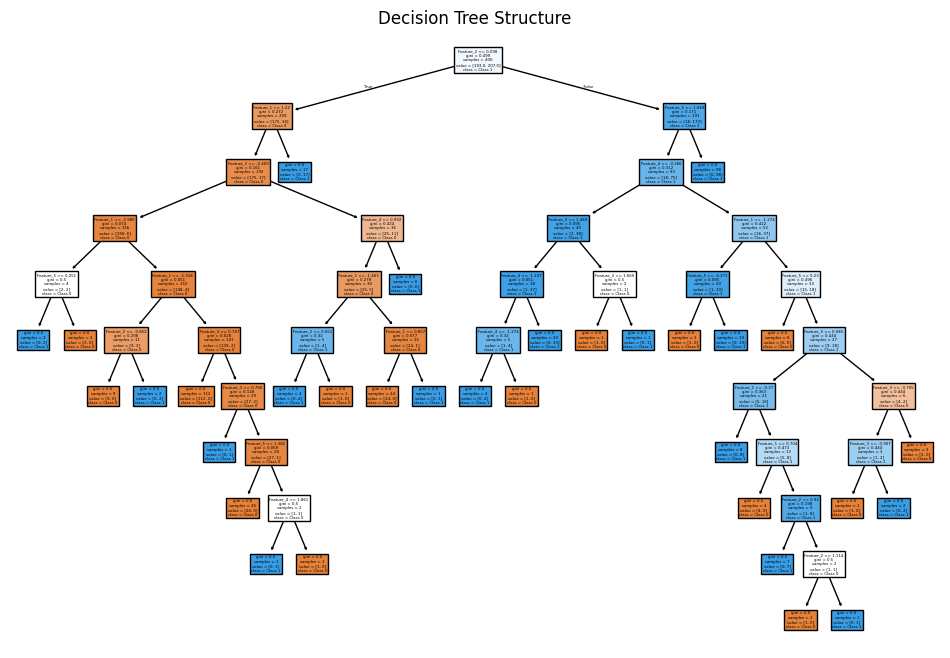

In [22]:
# Step 5: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True)
plt.title("Decision Tree Structure")
plt.show()


In [23]:

# Step 6: Hyperparameter Tuning
best_model = DecisionTreeClassifier(
    max_depth=3, min_samples_split=10, random_state=42
)
best_model.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=42)

In [24]:
# Evaluate tuned model
y_pred_tuned = best_model.predict(X_test)
print("\nTuned Model Accuracy:")
print(accuracy_score(y_test, y_pred_tuned))







Tuned Model Accuracy:
0.92


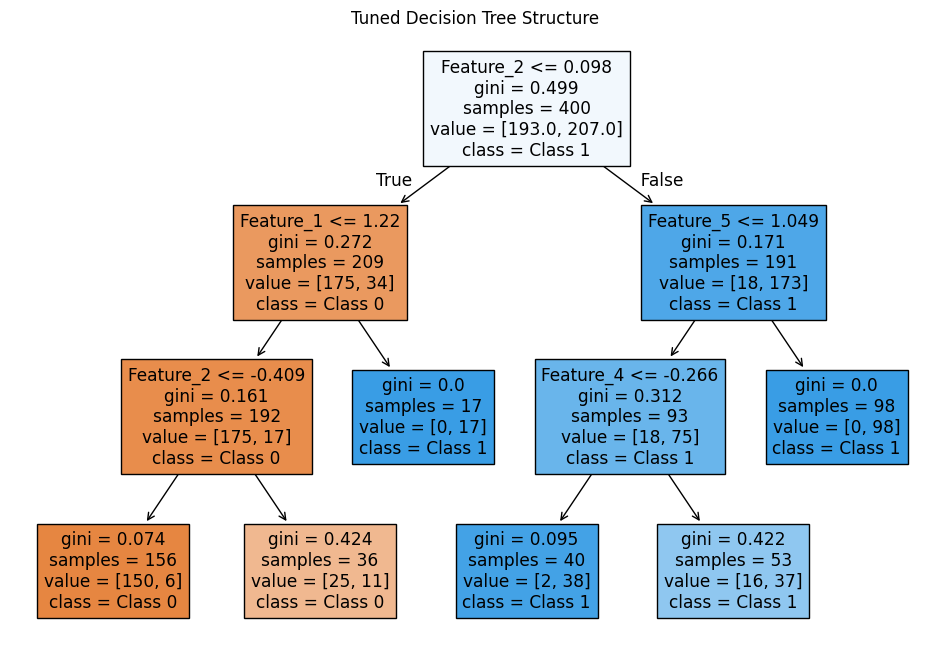

In [25]:
# Visualize tuned tree
plt.figure(figsize=(12, 8))
plot_tree(best_model, feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True)
plt.title("Tuned Decision Tree Structure")
plt.show()

In [26]:
# Export the rules of the tree
tree_rules = export_text(best_model, feature_names=list(X.columns))
print("\nDecision Tree Rules:")
print(tree_rules)


Decision Tree Rules:
|--- Feature_2 <= 0.10
|   |--- Feature_1 <= 1.22
|   |   |--- Feature_2 <= -0.41
|   |   |   |--- class: 0
|   |   |--- Feature_2 >  -0.41
|   |   |   |--- class: 0
|   |--- Feature_1 >  1.22
|   |   |--- class: 1
|--- Feature_2 >  0.10
|   |--- Feature_5 <= 1.05
|   |   |--- Feature_4 <= -0.27
|   |   |   |--- class: 1
|   |   |--- Feature_4 >  -0.27
|   |   |   |--- class: 1
|   |--- Feature_5 >  1.05
|   |   |--- class: 1



In [27]:
# prompt:  Export the rules of the tree
# tree_rules = export_text(best_model, feature_names=list(X.columns))
# print("\nDecision Tree Rules:")
# print(tree_rules)

# Export the rules of the tree
tree_rules = export_text(best_model, feature_names=list(X.columns))
print("\nDecision Tree Rules:")
tree_rules


Decision Tree Rules:


'|--- Feature_2 <= 0.10\n|   |--- Feature_1 <= 1.22\n|   |   |--- Feature_2 <= -0.41\n|   |   |   |--- class: 0\n|   |   |--- Feature_2 >  -0.41\n|   |   |   |--- class: 0\n|   |--- Feature_1 >  1.22\n|   |   |--- class: 1\n|--- Feature_2 >  0.10\n|   |--- Feature_5 <= 1.05\n|   |   |--- Feature_4 <= -0.27\n|   |   |   |--- class: 1\n|   |   |--- Feature_4 >  -0.27\n|   |   |   |--- class: 1\n|   |--- Feature_5 >  1.05\n|   |   |--- class: 1\n'